In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("automobile.csv")
df1 = df.copy()

In [3]:
df.shape

(205, 26)

In [ ]:
list(df)

In [20]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.dtypes

In [ ]:
df.info()

# Task

### 1. Describtive Analysis 

### 1.1 Understand the statistics of datasets such as mean, standard deviation, mode

In [8]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### 1.2 Distribution of categorical variables. df['price']

In [ ]:
df["price"].value_counts()

In [ ]:
median = df[df["price"]!="?"]["price"].median()

In [ ]:
df['price']

### 2. Data Exploration and Preprocessing

### 2.1 Check is missing values and replace with mean of the corresponding column

(array([17., 46., 31., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

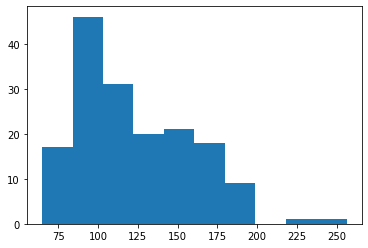

In [11]:
# here median is a good measure of central tendency because the graph is skewed but we use mean for practice purposes only
import matplotlib.pyplot as plt

%matplotlib inline
mean = df[df["normalized-losses"]!="?"]["normalized-losses"].astype(dtype = "float").mean()
plt.hist(df[df["normalized-losses"]!="?"]["normalized-losses"].astype(dtype = "float"),bins=10)

In [ ]:
df["normalized-losses"]=df["normalized-losses"].str.replace("?",str(mean)).astype(dtype="float")

(array([17., 46., 72., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

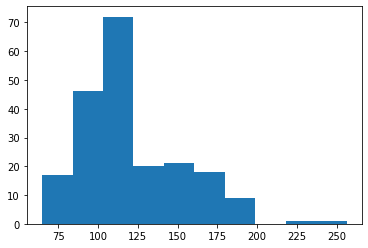

In [14]:
df["normalized-losses"].value_counts()
plt.hist(df["normalized-losses"].astype(dtype = "float"),bins=10)

**Check missing values**

In [ ]:
df["price"] = df["price"].str.replace("?",str(median)).astype(dtype="float")

### 2.2 Normalize the data using z-score normalization

In [9]:
# Select the columns of interest
columns_of_interest = ['price', 'engine-size']
data = df[columns_of_interest]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
standardized_df = pd.DataFrame(standardized_data, columns=columns_of_interest)

# Display the standardized data
print(standardized_df)


### Normalize the data using min-max scaling:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
normalized_df = pd.DataFrame(normalized_data, columns=columns_of_interest)

# Display the normalized data
print(normalized_df.head())


      price  engine-size
0  0.207959     0.260377
1  0.282558     0.260377
2  0.282558     0.343396
3  0.219254     0.181132
4  0.306142     0.283019


In [ ]:
df["price"] = df["price"].str.replace("?",str(median)).astype(dtype="float")

In [ ]:
df["horsepower"].value_counts()

In [ ]:
median_hp = df[df["horsepower"]!="?"]["horsepower"].median()
print(median_hp)

In [ ]:
df["horsepower"]=df["horsepower"].str.replace("?",str(median_hp)).astype(dtype="float")
df["horsepower"].value_counts()

In [ ]:
mean_rpm = df[df["peak-rpm"]!="?"]["peak-rpm"].astype(dtype="float").mean()
df["peak-rpm"] = df["peak-rpm"].str.replace("?",str(mean_rpm)).astype(dtype="float")
df["peak-rpm"].value_counts()

In [ ]:
#df["bore"] = pd.to_numeric(df["bore"],errors="coerce")

In [ ]:
mean_bore = df[df["bore"]!= "?"]["bore"].astype(dtype="float").mean()

In [ ]:
df["bore"] = df["bore"].str.replace("?",str(mean_bore)).astype(dtype="float")
df["bore"].value_counts()

In [15]:
mode_n = df[df["num-of-doors"]!="?"]["num-of-doors"].mode()

In [16]:
mode_n

0    four
Name: num-of-doors, dtype: object

In [17]:
df["num-of-doors"] = df["num-of-doors"].str.replace("?",str(mode_n))

/var/folders/9d/7f20ppnx1tndyhj_ryqldllm0000gn/T/ipykernel_4210/2979017735.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["num-of-doors"] = df["num-of-doors"].str.replace("?",str(mode_n))


<AxesSubplot:>

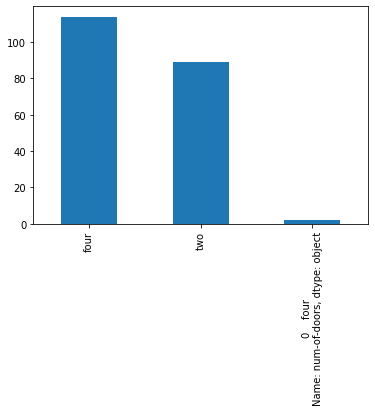

In [23]:
df["num-of-doors"].value_counts().plot(kind='bar')

<AxesSubplot:>

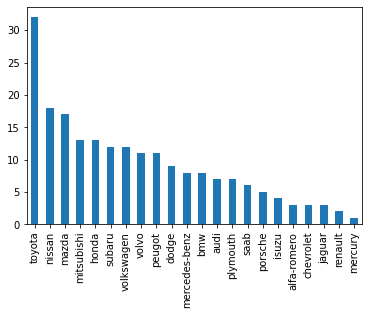

In [19]:
df["make"].value_counts().plot(kind="bar")

<AxesSubplot:>

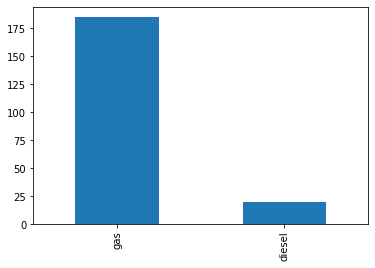

In [12]:
df["fuel-type"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='fuel-type'>

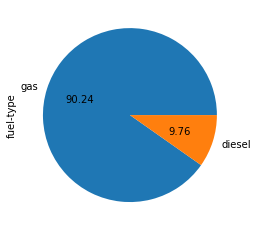

In [13]:
df["fuel-type"].value_counts().plot.pie(autopct="%.2f")

In [ ]:
df["aspiration"].value_counts().plot.pie(autopct="%.2f")

In [ ]:
df["drive-wheels"].value_counts().plot.pie(autopct="%.2f")

## 3. EDA

In [ ]:
df

### 3.1 Visualize the Relationships between variables 

Text(0.5, 0, 'HP')

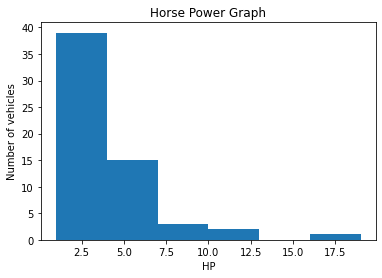

In [25]:
import seaborn as sns
df["horsepower"].value_counts().plot.hist(bins=6)
plt.title("Horse Power Graph")
plt.ylabel("Number of vehicles")
plt.xlabel("HP")

<AxesSubplot:ylabel='num-of-doors'>

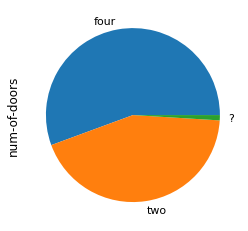

In [37]:
df["num-of-doors"].value_counts().plot.pie()

<AxesSubplot:>

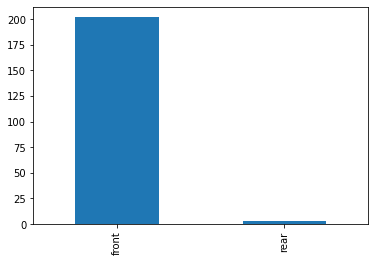

In [30]:
df["engine-location"].value_counts().plot.bar()

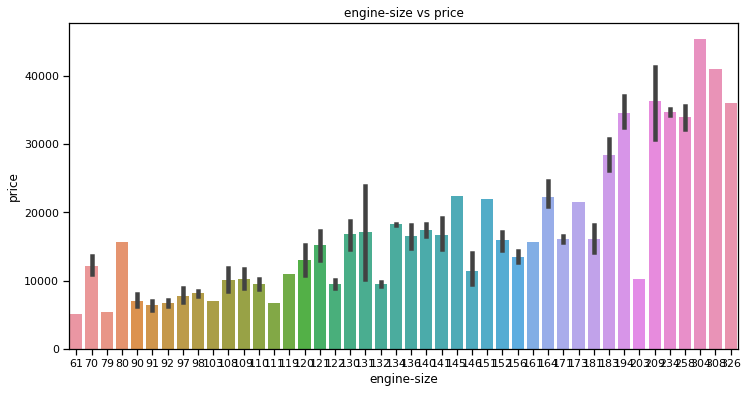

In [39]:
# Set the target variables
target_variable1 = 'engine-size'
target_variable2 = 'price'

# Create a bar chart to compare engine-size with price
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x=target_variable1, y=target_variable2)
plt.title(f'{target_variable1} vs {target_variable2}')
plt.xlabel(target_variable1)
plt.ylabel(target_variable2)
plt.show()

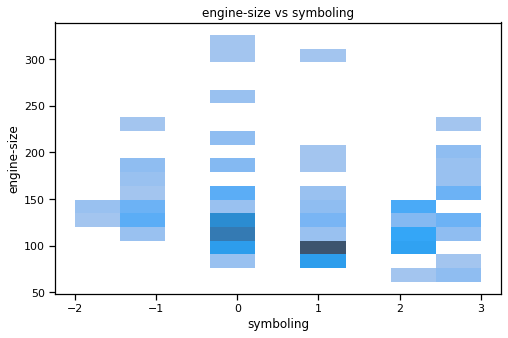

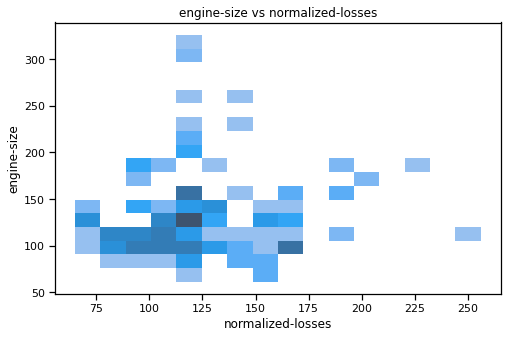

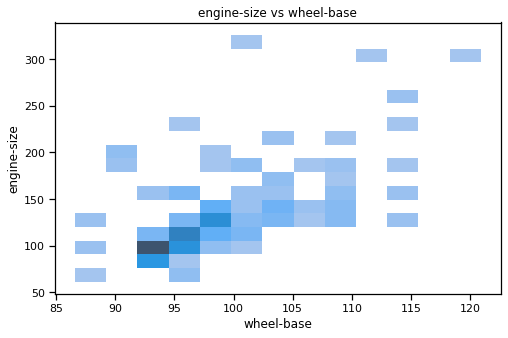

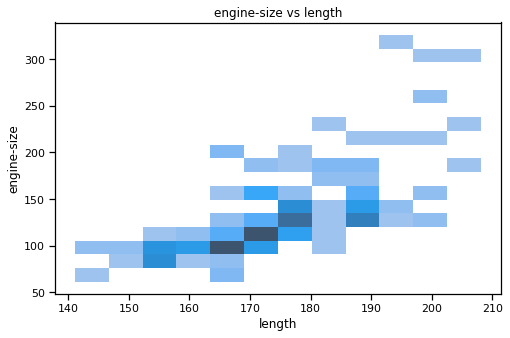

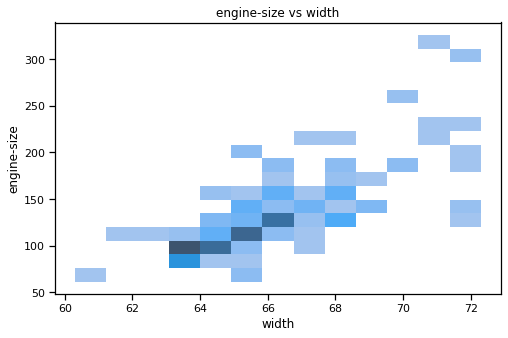

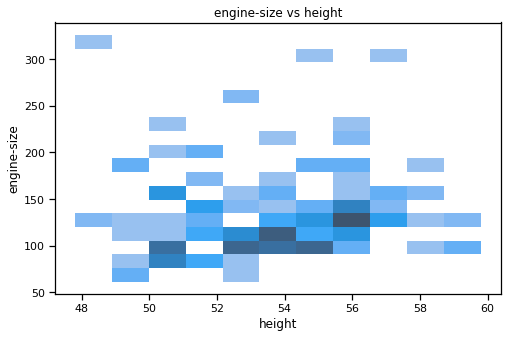

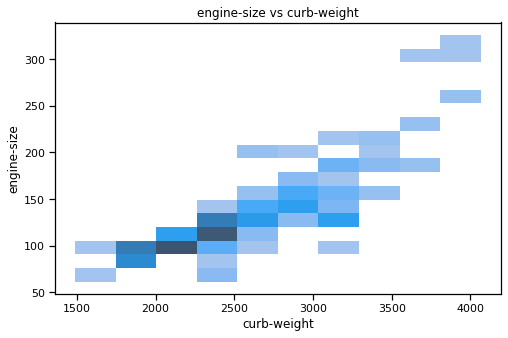

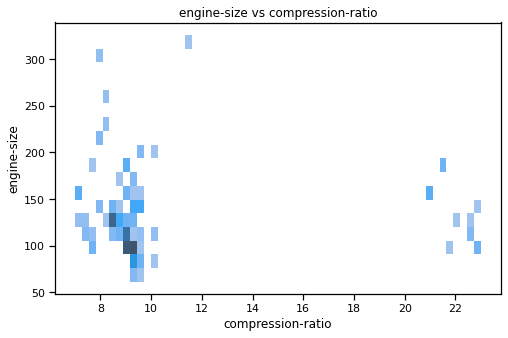

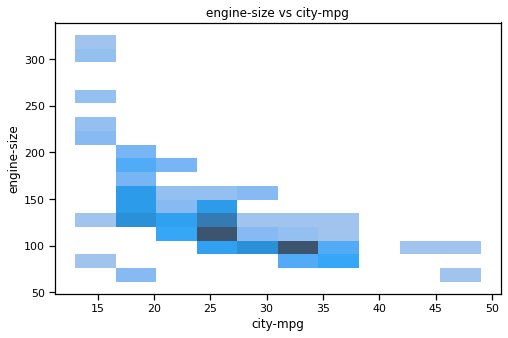

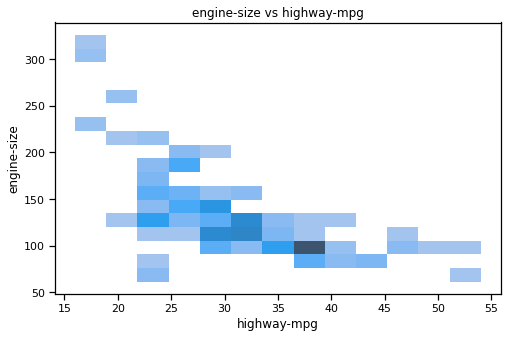

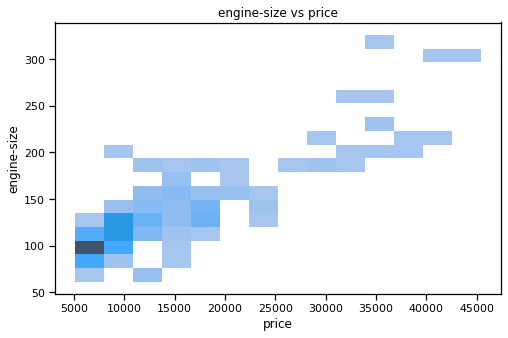

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the target variable
target_variable = 'engine-size'

# Iterate through each column (excluding the target variable) and visualize the distribution
for column in df.columns:
    if column != target_variable and df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 5))
        sns.histplot(data=df, x=column, y=target_variable)
        plt.title(f'{target_variable} vs {column}')
        plt.show()
        

<AxesSubplot:ylabel='Frequency'>

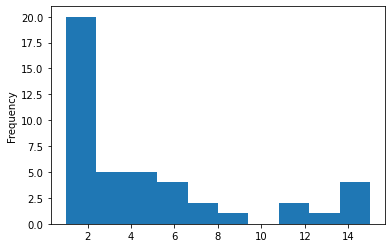

In [31]:
df["engine-size"].value_counts().plot.hist()

In [ ]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize=(20,10))
a = sns.heatmap(corr,annot = True,fmt=".2f")

In [ ]:
#df.drop(columns={"symboling","wheel-base","width","city-mpg"})

In [ ]:
g = sns.lmplot("normalized-losses","symboling",df)

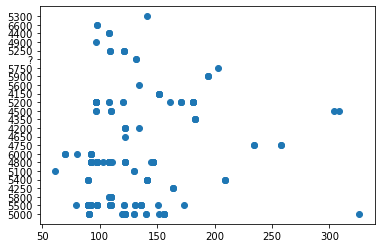

In [25]:
plt.scatter(df["engine-size"],df["peak-rpm"])

In [ ]:
g = sns.lmplot("highway-mpg","curb-weight",df,hue= "make",fit_reg=False)

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.boxplot(x = "drive-wheels",y= "price",data=df)

In [ ]:
plt.rcParams["figure.figsize"] = (25,15)
ax = sns.boxplot(x = "make",y= "price",data=df)

## Identify any patterns or anomalies in the dataset

<Figure size 1080x576 with 0 Axes>

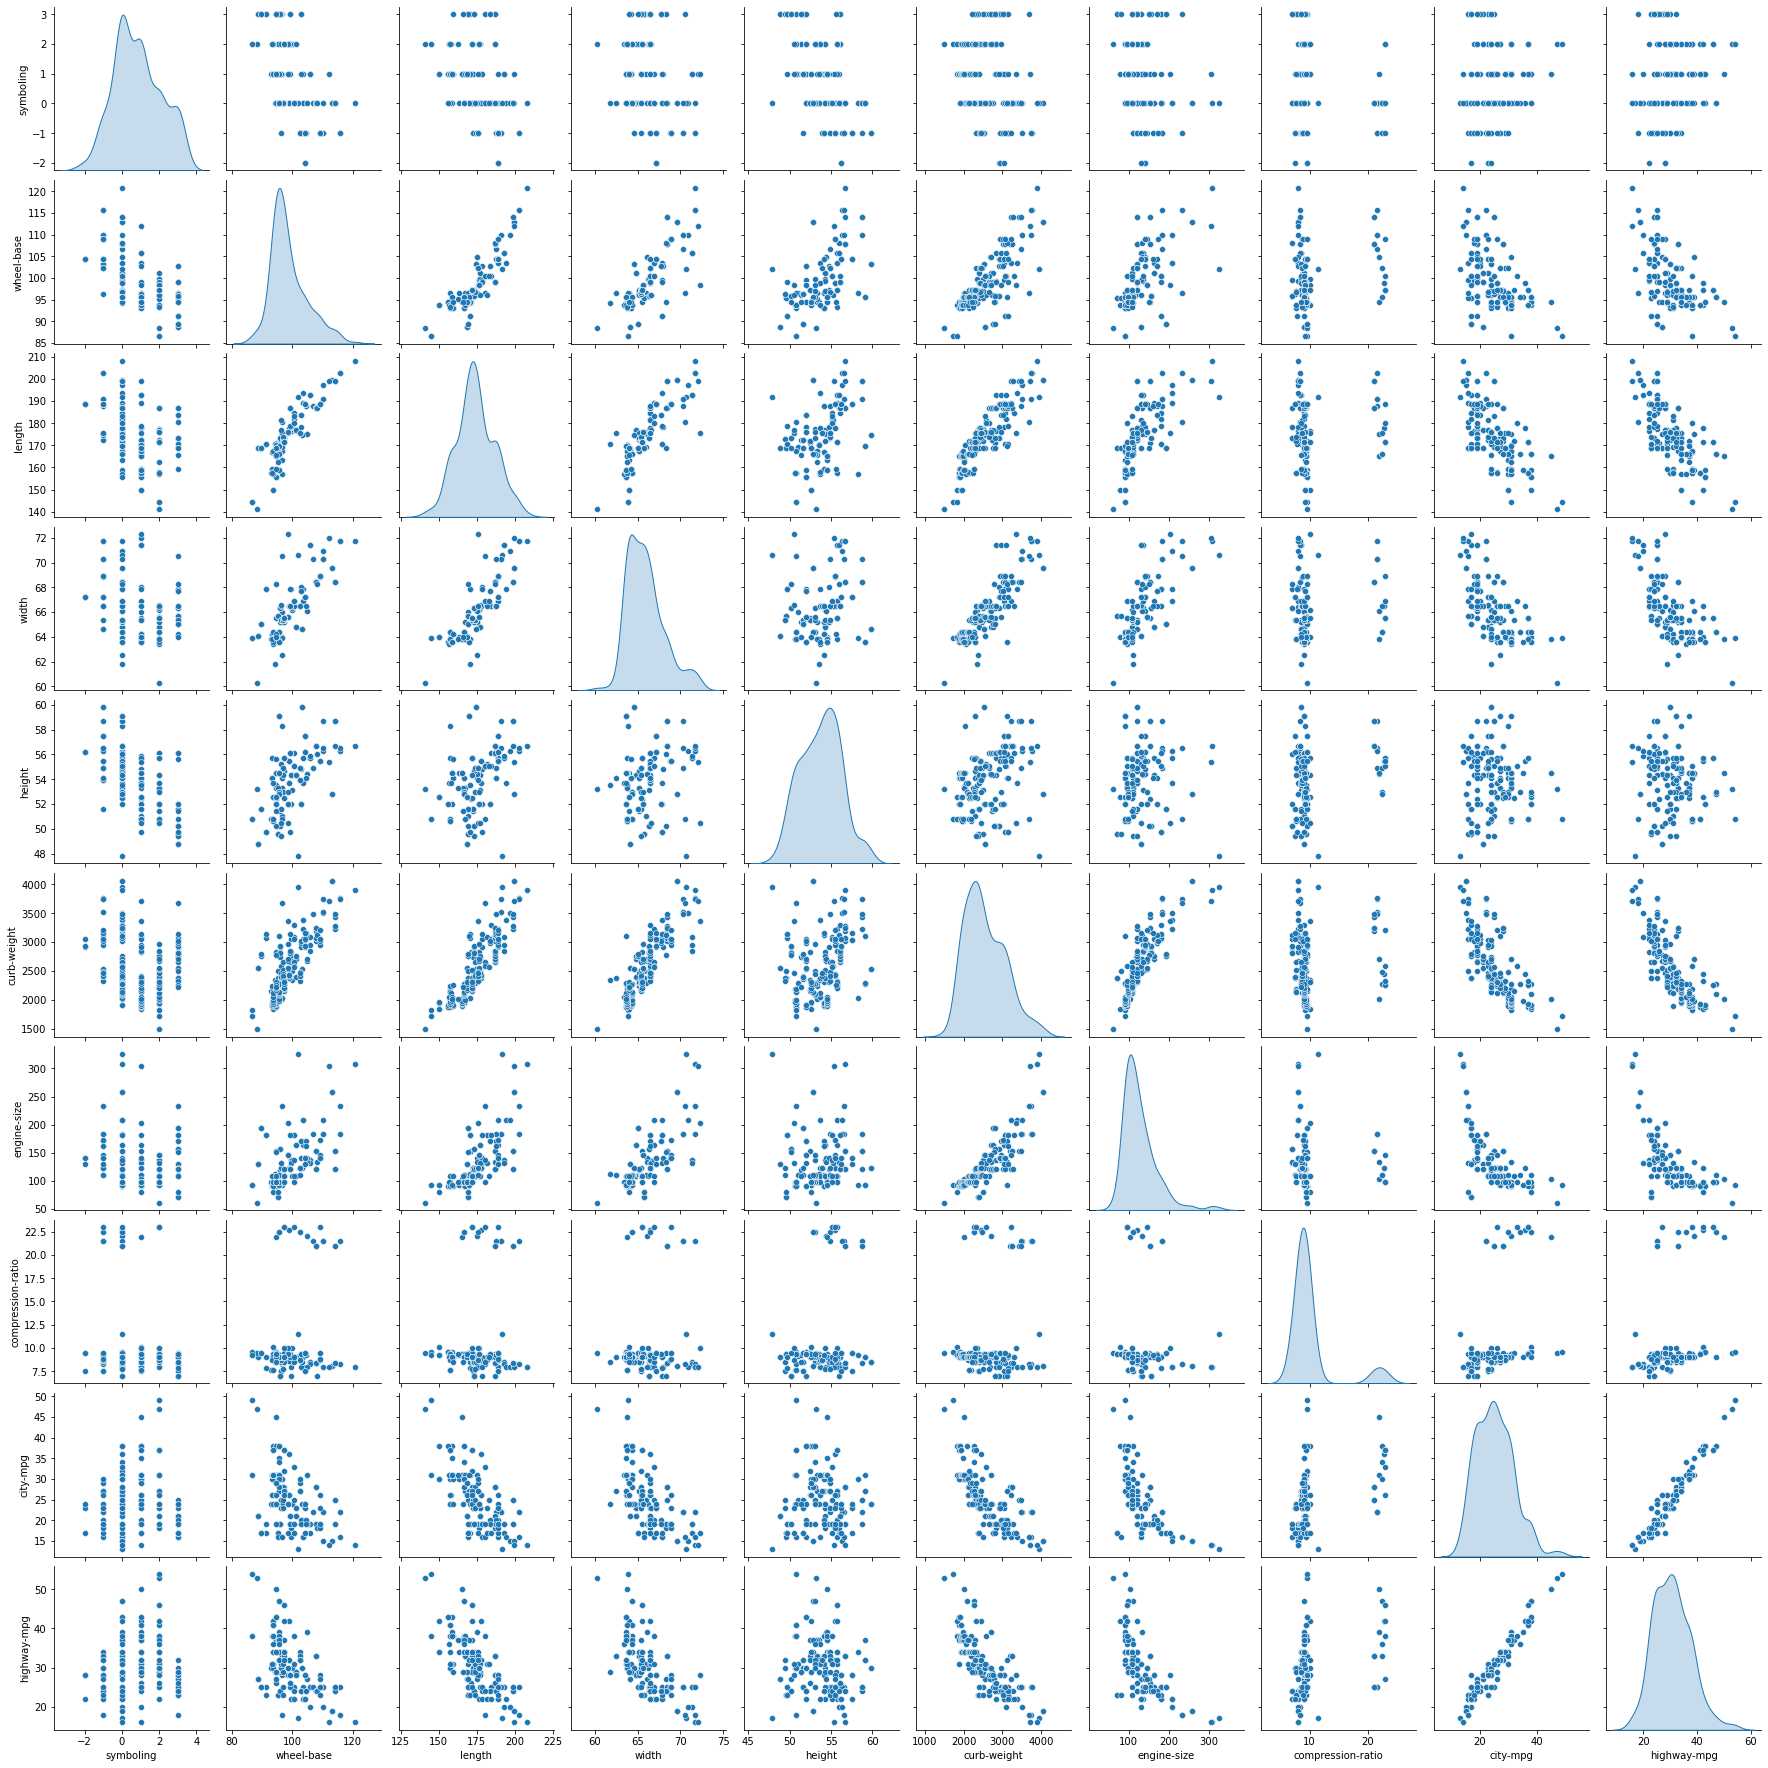

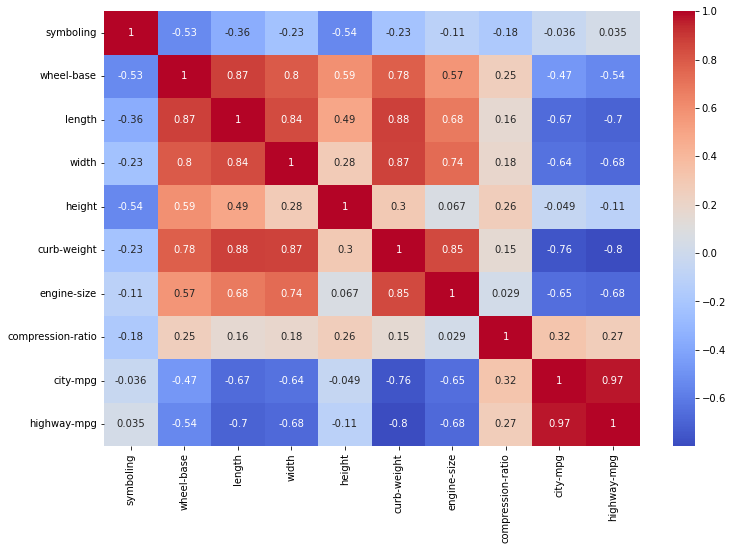

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical columns
# plt.figure(figsize=(15, 8))
# sns.pairplot(df, diag_kind='kde')
# plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()